---
# **Capstone Project - Finance and Risk Analytics**
---
## **<u>Problem Statement</u>**
> The given task is to provide consultation to two different investors, Mr Patrick Jyenger and Mr Peter Jyenger based on their requirements and financial objectives.

## **<u>Steps performend</u>**
1. Importing Necessary Liberaries
2. Importing, Cleaning and Understanding Dataset
  * Importing Dataset (.csv file) to Dataframe
    * Merging all files to create a final dataframe
    * Creating a pivot table for visualization
    * Creating new column to understand Day-to-Day chnages in stocks
  * Cleaning dataframe
    * Replacing all NULL/NA values with 0 (as for stock analysis each and every data row of data is important)
    * Checking for abnormal data types for coulmns
3. Visualization
  * Visualzing stocks of different Industry uisng Pair plot based on Returns of each stocks
  * Visualization of stocks using Line Graph based on Return of stocks
  * Visualizing distribution of stocks using Distribution plot based on Return from stocks
  * Visualizing correlation between stocks using Heatmap Subplots based on Return
  * Visualizing Trend Type of stocks using Candelstick
    * Uptrend
    * Downtrend
    * Sideways Trend
  * Visualizing data statistically based on Retuns of each stocks
4. Profiling
  * Profile 1 -> Patrick
    * Creating new dataframe and finding Correlation between stocks using Heatmap
    * Calculating cumulative return of the stocks selected for Patrick
    * Statistical understanding based on Cumulative Retuns of each stocks selected for Patrick
  * Profile 2 -> Peter
    * Creating new dataframe and finding Correlation between stocks using Heatmap for Peter
    * Calculating cumulative return of the stocks selected for Peter
    * Statistical understanding based on Cumulative Retuns of each stocks selected for Peter

---
# **Step 1: Importing Necessary Liberaries** 
---

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

---
# **Step 2: Importing, Cleaning and Understanding Dataset**
---

## **2.1** Importing dataset to Dataframe

In [ ]:
# Importing dataset
annexure_df=pd.read_csv('Final_Merged_Dfs/Annexure-I.csv')

annexure_df.loc[len(annexure_df.index)] = [
    'S&P500', 'S&P500', 'S&P500']

# removing all the spaces for left and right side of Tickers
annexure_df['Ticker'] = annexure_df['Ticker'].str.strip()

In [ ]:
# viewing number of rows and columns
print("Rows, Columns\n",annexure_df.shape,"\n----------------------------------------------")

# printing some rows of created dataframe
annexure_df.head()

Rows, Columns
 (25, 3) 
----------------------------------------------


Ticker  Industry                 Company Name
0    AAL  Aviation  American Airlines Group Inc
1   ALGT  Aviation     Allegiant Travel Company
2    ALK  Aviation         Alaska Air Group Inc
3    DAL  Aviation          Delta Air Lines Inc
4     HA  Aviation        Hawaiian Holdings Inc

##### **Observations:**
* `annexure_df` contains all the Tickers (stock), Industry they belong to and their Company name

In [ ]:
# searching files in the given location
allFiles = [os.path.join(root, name)
for root, dirs, files in os.walk('Final_Merged_Dfs/')
for name in files if name.endswith('.csv')]

# creating list of Files stored in given location
allFiles = [i for i in allFiles if 'Annexure' not in i]

# printing all files with their loaction
print(allFiles)

['/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/CS.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/DAL.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/BHC.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/AAPL.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/ALK.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/MSFT.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/AMZN.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/IBM.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/JNJ.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/AAL.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/DB.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/HA.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/GS.csv', '/content/drive/MyDrive/Capstone Project/Final_Merged_Dfs/MRK.csv', '/content/drive/MyDrive/Capstone Project/Final_M

In [ ]:
# storing all the files data into a list
df_files_list = []
for i in allFiles:
    df = pd.read_csv(i).dropna(subset=['Date'])
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df = df.sort_values(by=['Date'])
    df['Ticker'] = i.split('/')[-1].replace('.csv', '')
    df['Prev Adj Close'] = df['Adj Close'].shift(1)
    df['Return'] = (df['Adj Close']/df['Prev Adj Close']) - 1
    df['Cumulative Return'] = (1+df['Return']).cumprod()
    del df['Prev Adj Close']
    df_files_list.append(
        df[['Date', 'Ticker', 
            'Open', 'High', 'Low', 'Close', 
            'Adj Close', 'Volume', 
            'Return', 'Cumulative Return']])

# converting list of data to Dataframe
stock_df = pd.concat(df_files_list)

# removing unecessary spaces for values of Ticker column
stock_df['Ticker'] = stock_df['Ticker'].str.strip()

# printing dataset
stock_df.head()

Date Ticker       Open  ...    Volume    Return  Cumulative Return
0 2010-01-04     CS  49.902344  ...  734200.0       NaN                NaN
1 2010-01-05     CS  51.250000  ...  447700.0  0.008271           1.008271
2 2010-01-06     CS  50.224609  ...  751200.0 -0.013926           0.994230
3 2010-01-07     CS  51.250000  ...  833700.0  0.040433           1.034430
4 2010-01-08     CS  52.548828  ...  706900.0  0.014689           1.049625

[5 rows x 10 columns]

In [ ]:
# merging two dataframes using Left merge
stock_df = pd.merge(
    stock_df, annexure_df[['Ticker', 'Industry']], 
    on='Ticker', how='left')

# converting dataframe to .csv file for future use
stock_df.to_csv('input_data.csv', index=False)

# printng dataframe
stock_df.head()

Date Ticker       Open  ...    Return  Cumulative Return  Industry
0 2010-01-04     CS  49.902344  ...       NaN                NaN   Finance
1 2010-01-05     CS  51.250000  ...  0.008271           1.008271   Finance
2 2010-01-06     CS  50.224609  ... -0.013926           0.994230   Finance
3 2010-01-07     CS  51.250000  ...  0.040433           1.034430   Finance
4 2010-01-08     CS  52.548828  ...  0.014689           1.049625   Finance

[5 rows x 11 columns]

In [ ]:
# rows and columns of dataframe
print("Rows, Columns")
stock_df.shape

Rows, Columns


(63642, 11)

#### **2.1.1** Day-to-day percentage change

In [ ]:
# creating new column using pct_change() function
stock_df['Day_Percent_Change'] = stock_df['Adj Close'].pct_change()*100

# rounding values to 2 decimal
stock_df = stock_df.round(2)

stock_df.head()

Date Ticker   Open  ...  Cumulative Return  Industry  Day_Percent_Change
0 2010-01-04     CS  49.90  ...                NaN   Finance                 NaN
1 2010-01-05     CS  51.25  ...               1.01   Finance                0.83
2 2010-01-06     CS  50.22  ...               0.99   Finance               -1.39
3 2010-01-07     CS  51.25  ...               1.03   Finance                4.04
4 2010-01-08     CS  52.55  ...               1.05   Finance                1.47

[5 rows x 12 columns]

In [ ]:
# creating a pivot table with Column as aggreated for ease in Visuaization
def get_industry_df(column_, industry_=None, ticker_list_=None):
    if industry_ is not None:
        industry_df = pd.pivot(
            stock_df[stock_df['Industry']==industry_][['Date', 'Ticker', column_]], 
            index='Date', columns='Ticker', values=column_)
    else:
        industry_df = pd.pivot(
            stock_df[stock_df['Ticker'].isin(ticker_list_)][['Date', 'Ticker', column_]], 
            index='Date', columns='Ticker', values=column_)
    industry_df.columns.name = None
    return industry_df

## **2.2** Cleaning Dataset

In [ ]:
# cheking for NA / NULL values
print("--------------------------------------\nCheck for NA / NULL values\n--------------------------------------\n",
      stock_df.isnull().sum())
print("\n--------------------------------------")

# dropping NA / NULL values
stock_df = stock_df.fillna(0)

# rechecking for NA / NULL values
print("After dropping NA / NULL values\n--------------------------------------\n",
      stock_df.isnull().sum())

# rows and columns of finalized dataframe after treating NULL / NA values
print("--------------------------------------\nRows, Columns")
stock_df.shape

--------------------------------------
Check for NA / NULL values
--------------------------------------
 Date                   0
Ticker                 0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
Return                25
Cumulative Return     25
Industry               0
Day_Percent_Change     1
dtype: int64

--------------------------------------
After dropping NA / NULL values
--------------------------------------
 Date                  0
Ticker                0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
Return                0
Cumulative Return     0
Industry              0
Day_Percent_Change    0
dtype: int64
--------------------------------------
Rows, Columns


(63642, 12)

##### **Observations:**
* Coulmn `Return` and `Cumulative Return` have few NULL values which either could be replaced with 0 or be removed.
* No `Return` and `Cumulative Return` could also indicate that on these days the stock market must be closed, hence, the return is null.

In [ ]:
# priniting first 5 rows
stock_df.head()

Date Ticker   Open  ...  Cumulative Return  Industry  Day_Percent_Change
0 2010-01-04     CS  49.90  ...               0.00   Finance                0.00
1 2010-01-05     CS  51.25  ...               1.01   Finance                0.83
2 2010-01-06     CS  50.22  ...               0.99   Finance               -1.39
3 2010-01-07     CS  51.25  ...               1.03   Finance                4.04
4 2010-01-08     CS  52.55  ...               1.05   Finance                1.47

[5 rows x 12 columns]

In [ ]:
#checking data type for each column
stock_df.dtypes

Date                  datetime64[ns]
Ticker                        object
Open                         float64
High                         float64
Low                          float64
Close                        float64
Adj Close                    float64
Volume                       float64
Return                       float64
Cumulative Return            float64
Industry                      object
Day_Percent_Change           float64
dtype: object

##### **Observations:**
* As it can be seen that all the values in the respective columns are stored according to the required datatypes, hence, no datatype conversion is required.

---
# **Step 3: Visualization**
---

In [ ]:
# printing different the industry name
stock_df['Industry'].unique()

array(['Finance', 'Aviation', 'Pharmaceuticals', 'Technology',
       'Healthcare', 'S&P500'], dtype=object)

### **3.1** Visualzing stocks of different Industry uisng Pair plot based on Returns of each stocks

#### **3.1.1** Technology Stocks

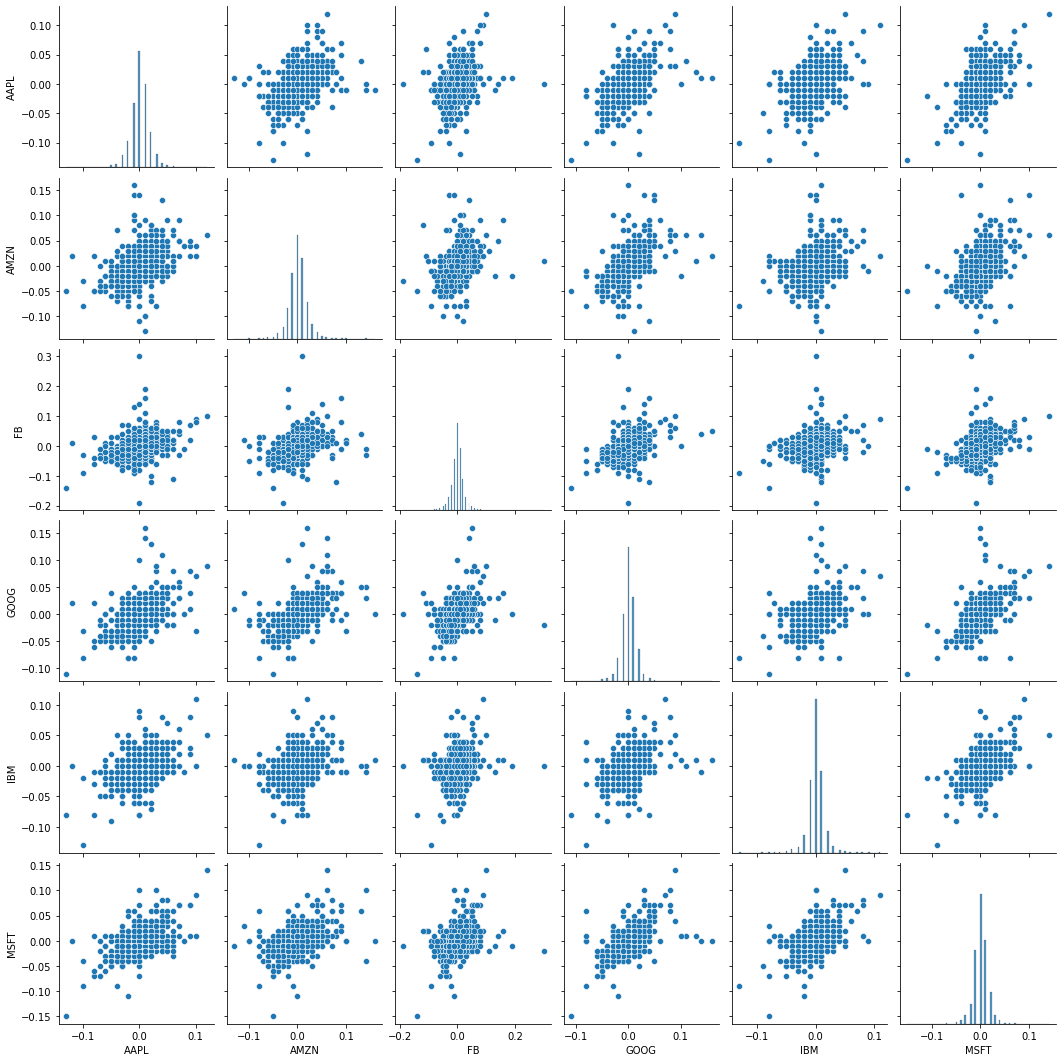

In [ ]:
# Plotting Industry wise Pairplot
tech_df = get_industry_df(industry_='Technology', column_='Return')
sns.pairplot(data=tech_df)
plt.show()

##### **Observations:**
* All Tickers or Stocks such as `MSFT-AAPL`, `IBM-AMZN`, `AAPL-GOOG`, `GOOG-IBM`, etc. show positive correlation i.e. as one increases other also increases or vice versa.
* But stock FB seems to be negatively correlated or has no coorelation with any stocks in Technology industry.
* There seems to have some outliers which can be ignored as on some odd days stocks might return higher than what they usually returned.
* The distribution seems to be normal distribution.

#### **3.1.2** Finance Stocks

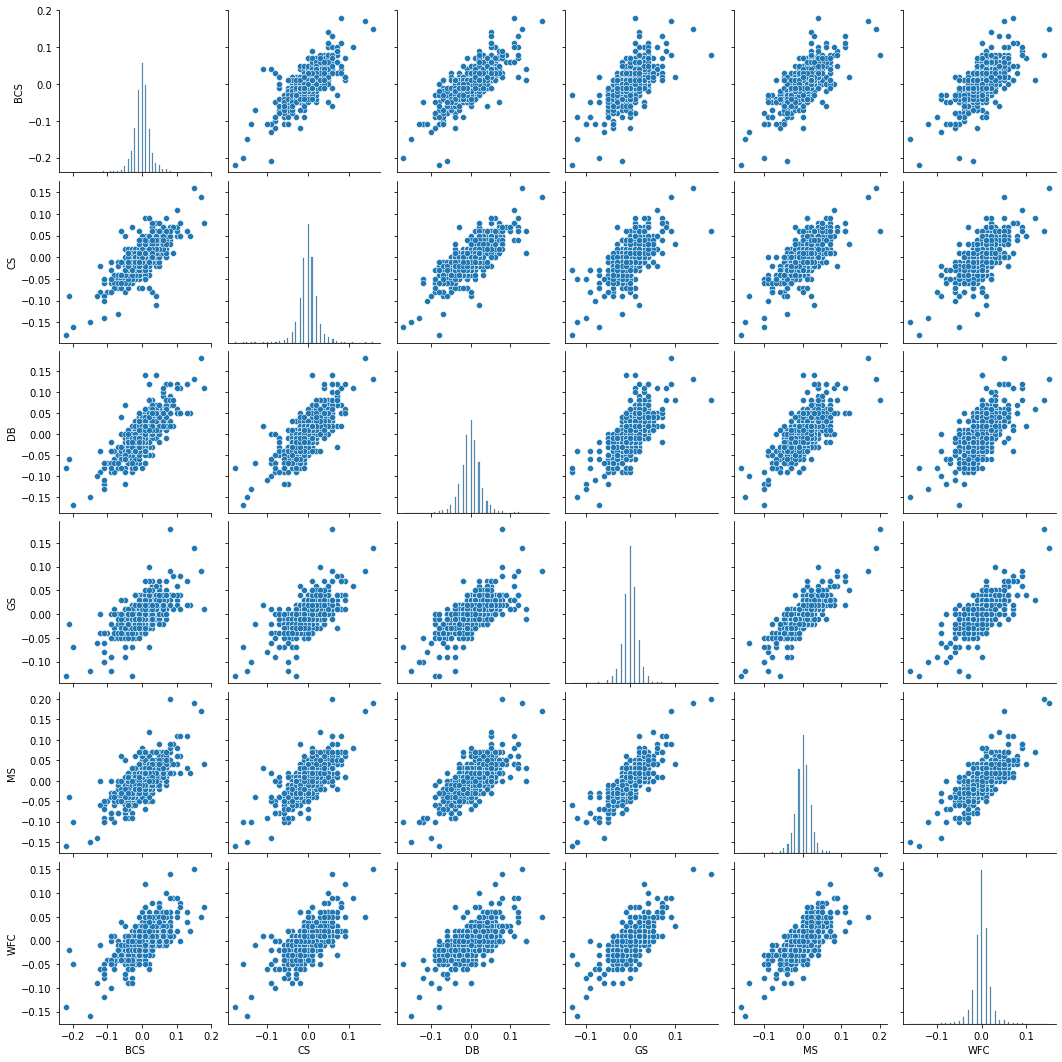

In [ ]:
fin_df = get_industry_df(industry_='Finance', column_='Return')
sns.pairplot(data=fin_df)
plt.show()

##### **Observations:**
* All Tickers or Stocks show positive correlation i.e. as one increases other also increases or vice versa.
* There seems to have some outliers which can be ignored as on some odd days stocks might return higher than what they usually returned.
* The distribution seems to be normal distribution.

#### **3.1.3** Aviation Stocks

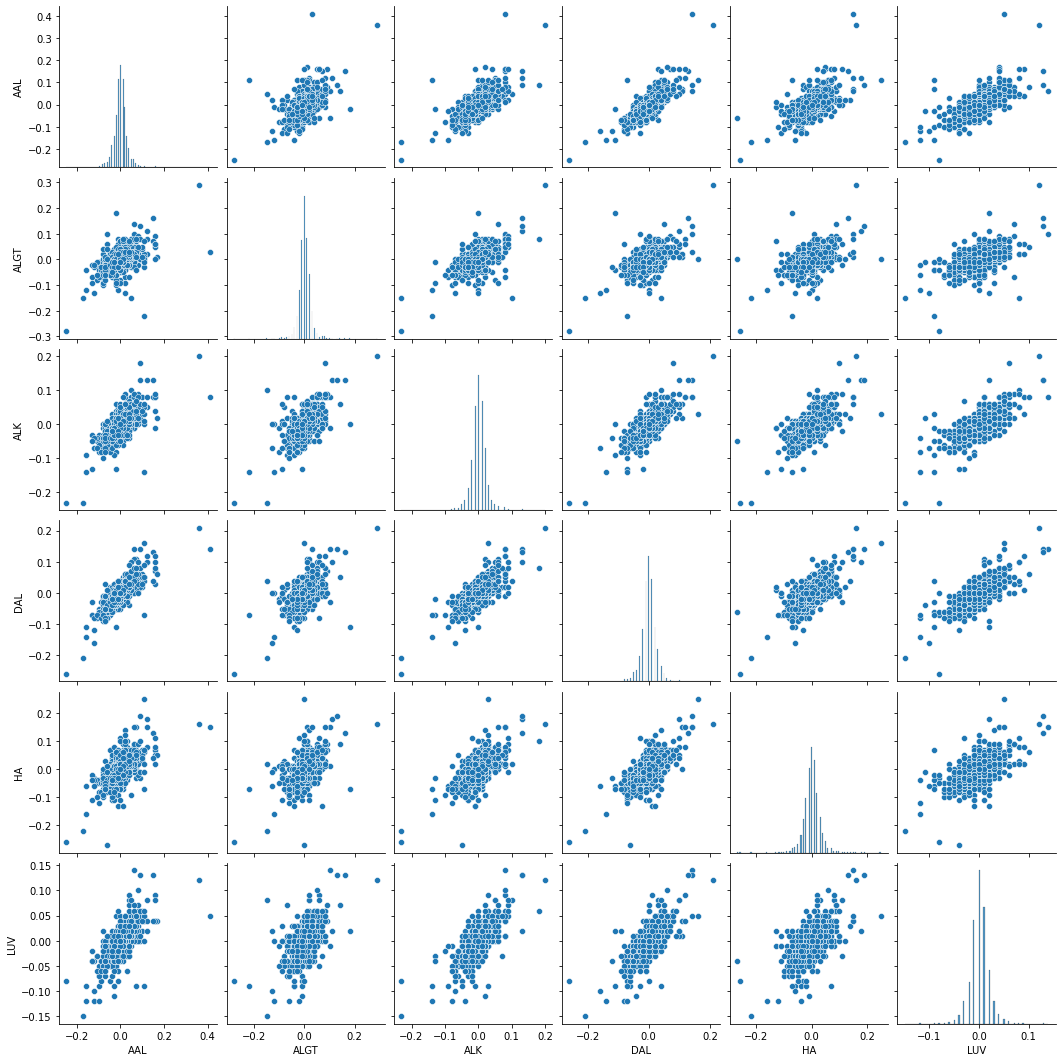

In [ ]:
avi_df = get_industry_df(industry_='Aviation', column_='Return')
sns.pairplot(data=avi_df)
plt.show()

##### **Observations:**
* Some tickers or stocks show positive correlation i.e. as one increases other also increases or vice versa.
* Some tickers do not show any relationship.
* There seems to have some outliers which can be ignored as on some odd days stocks might return higher than what they usually returned.
* The distribution seems to be normal distribution.

#### **3.1.4** Healthcare Stocks

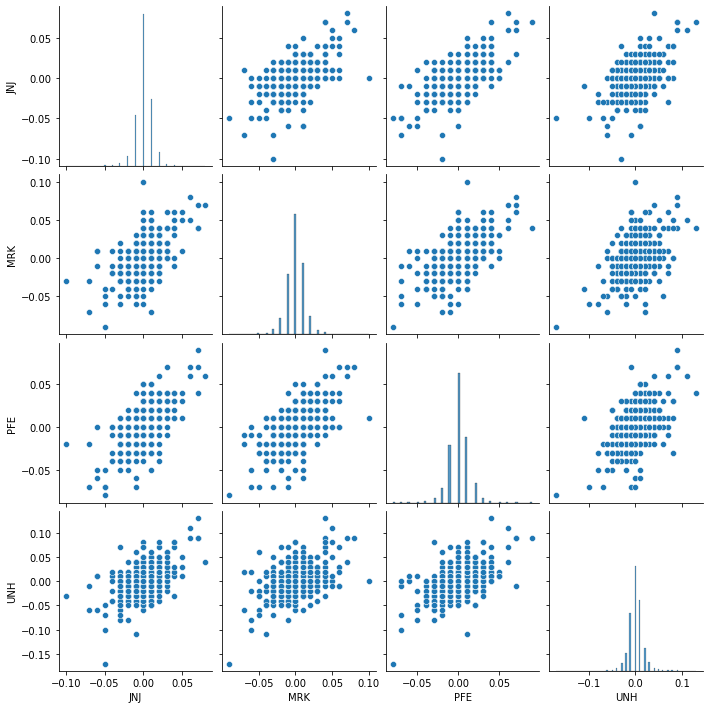

In [ ]:
health_df = get_industry_df(industry_='Healthcare', column_='Return')
sns.pairplot(data=health_df)
plt.show()

##### **Observations:**
* Some tickers or stocks show positive correlation i.e. as one increases other also increases or vice versa.
* Some tickers like `UNH` with any other Healthcare Industry stocks do not show any relationship.
* There seems to have some outliers which can be ignored as on some odd days stocks might return higher than what they usually returned.
* The distribution seems to be normal distribution.

#### **3.1.5** Pharmaceuticals Stocks

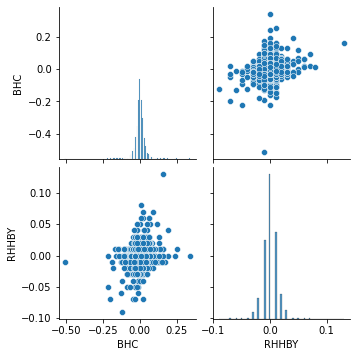

In [ ]:
pharma_df = get_industry_df(industry_='Pharmaceuticals', column_='Return')
sns.pairplot(data=pharma_df)
plt.show()

##### **Observations:**
* No tickers show any correlation.
* There seems to have some outliers which can be ignored as on some odd days stocks might return higher than what they usually returned.
* The distribution seems to be normal distribution.

### **3.2** Visualization of stocks using Line Graph

#### **3.2.1** High Prices


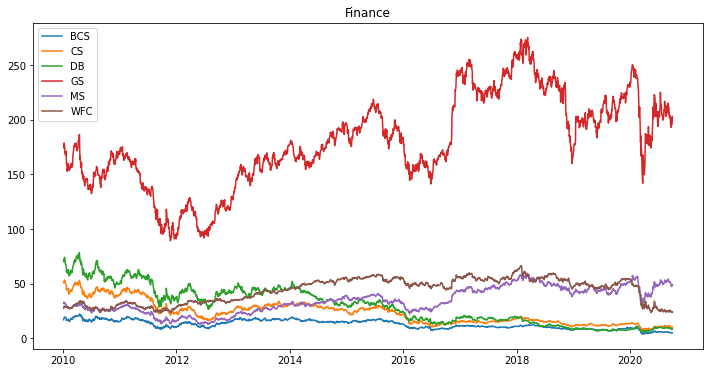

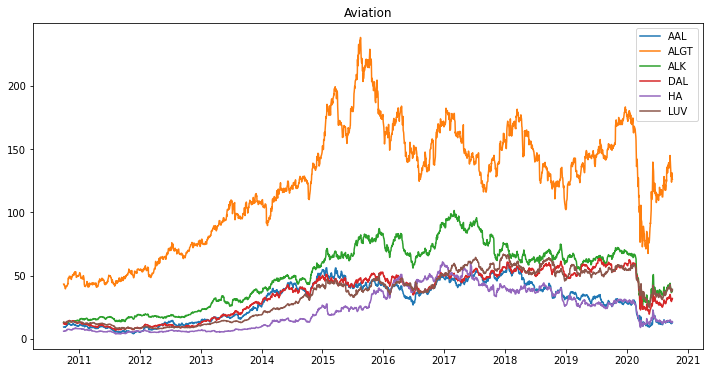

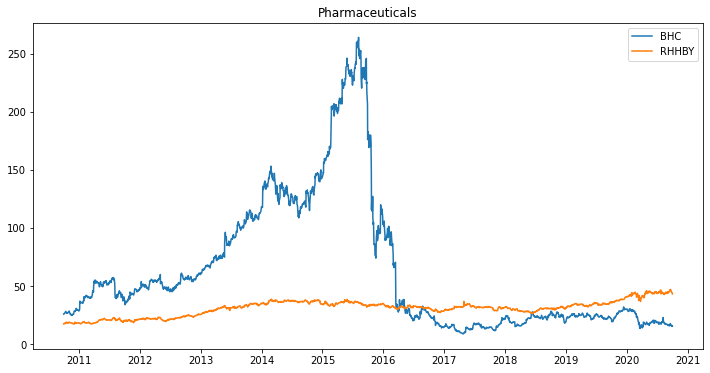

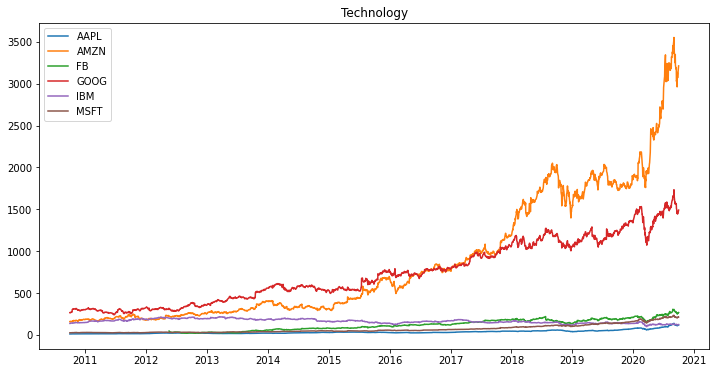

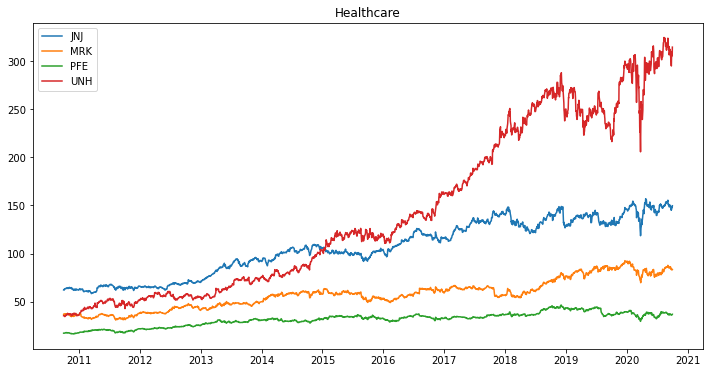

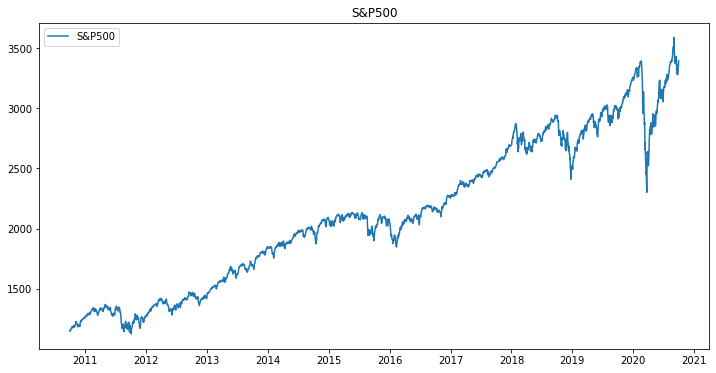

In [ ]:
for i in stock_df['Industry'].unique():
    industry_df = get_industry_df(
        industry_=i, column_='High')

    plt.figure(figsize=(12,6))
    plt.plot(industry_df)
    plt.legend(industry_df.columns.values)
    plt.title(i)
    plt.show()

#### **3.2.2** Low Prices

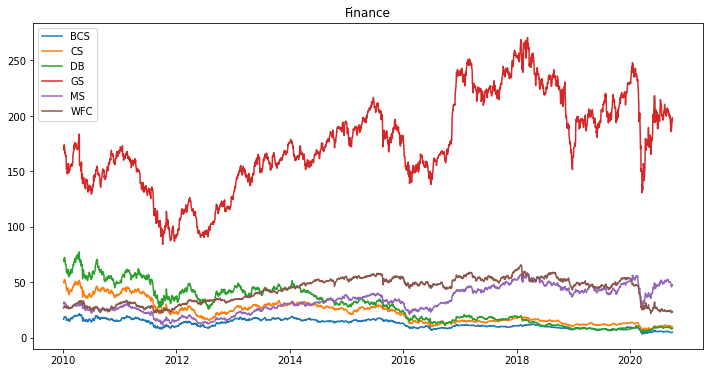

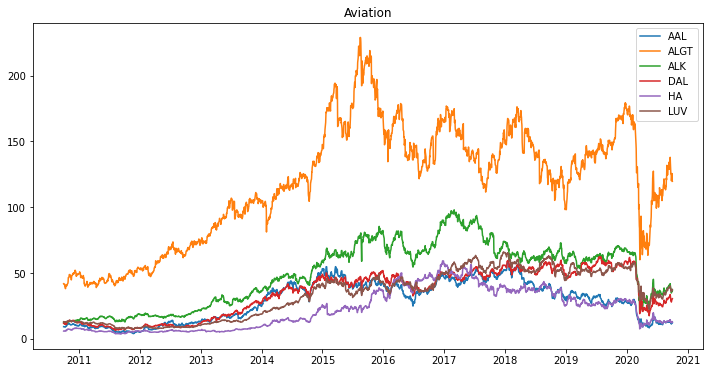

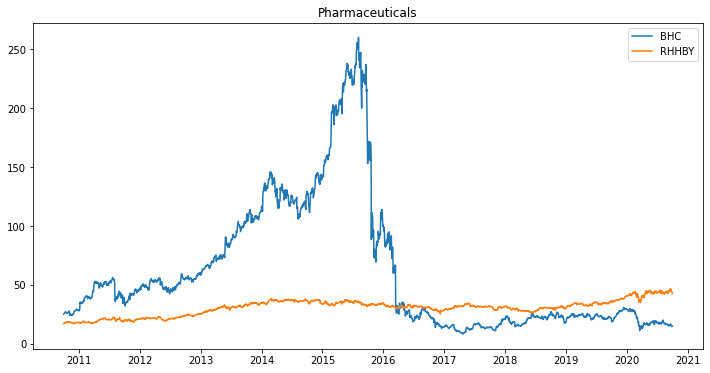

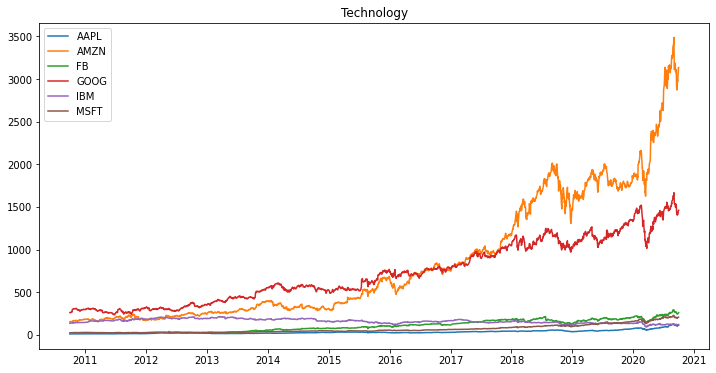

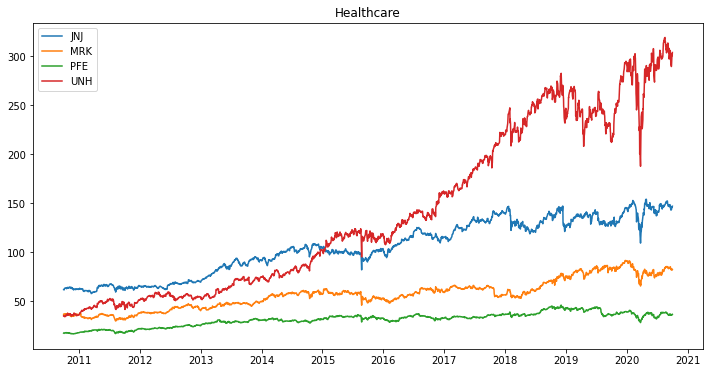

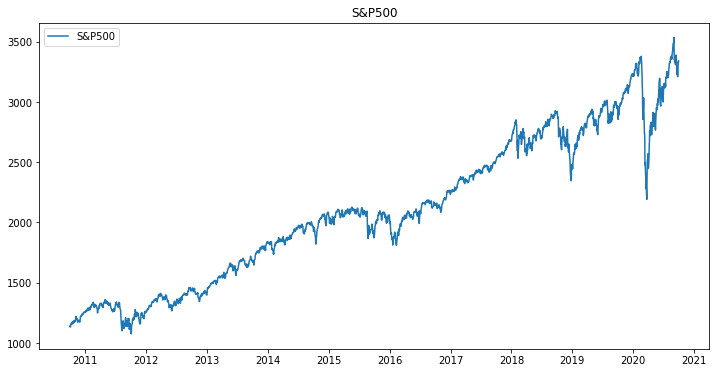

In [ ]:
for i in stock_df['Industry'].unique():
    industry_df = get_industry_df(
        industry_=i, column_='Low')

    plt.figure(figsize=(12,6))
    plt.plot(industry_df)
    plt.legend(industry_df.columns.values)
    plt.title(i)
    plt.show()

##### **Observations:**
1. By observing both High and Low price of tickers or stocks of different Industries over the period of 10 years we could conclude that
  * In Tech industry mentioned tickers have highest performance
    * AMZN
    * GOOG
  * In Finance industry mentioned tickers have highest performance
    * GS
  * In Aviation industry mentioned tickers have highest performance
    * ALGT
  * In Healthcare industry mentioned tickers have highest performance
    * UNH
    * JNJ
  * In Pharmaceuticals none of the tickers have performed well.

2. All the ticker belonging to different industries show a sudden dip in their performance in between the year 2020 to 2021.

3. The low performance of stocks after year 2020 must be due to the affect of Pandemic caused my the spread of COVID-19.



#### **3.2.3** Return
 

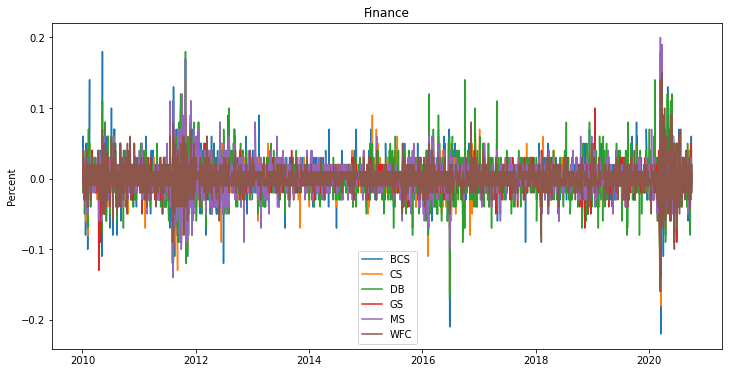

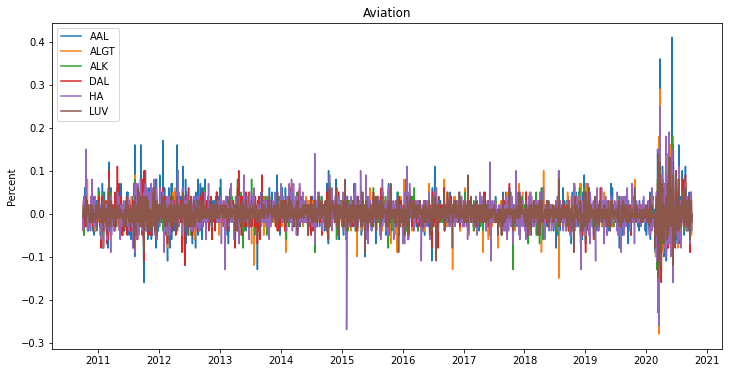

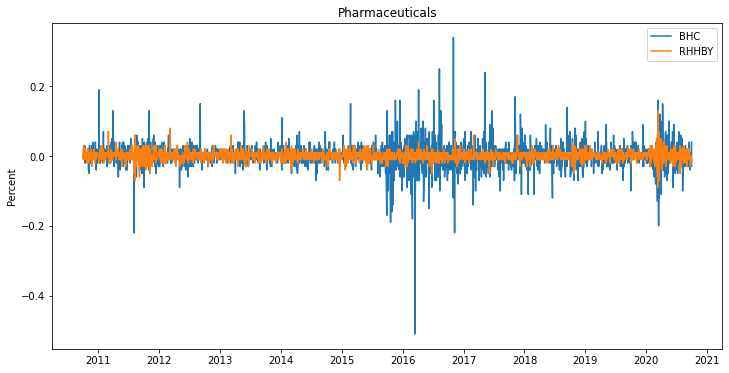

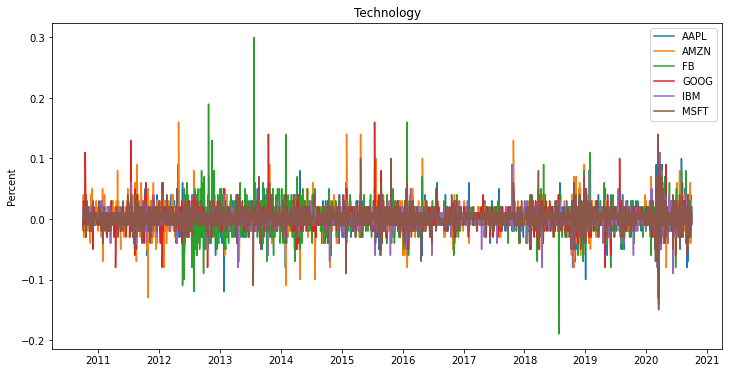

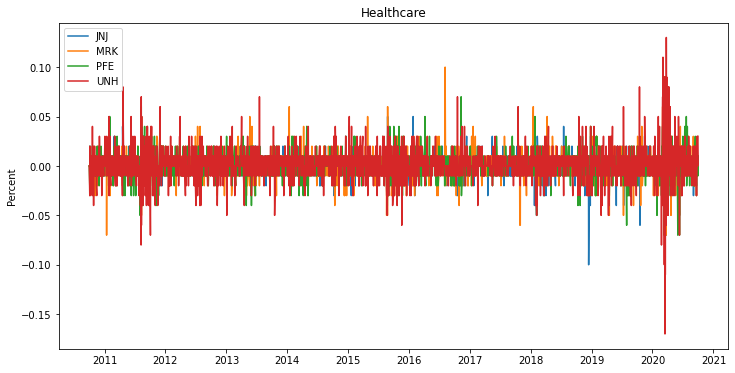

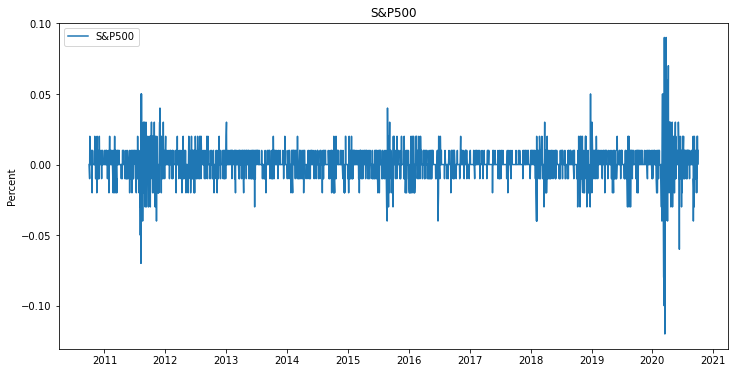

In [ ]:
for i in stock_df['Industry'].unique():
    industry_df = get_industry_df(
        industry_=i, column_='Return')

    plt.figure(figsize=(12,6))
    plt.plot(industry_df)
    plt.legend(industry_df.columns.values)
    plt.ylabel('Percent')
    plt.title(i)
    plt.show()

##### **Observations:**
1. After looking at the daily returns chart for Finance, Aviation and Technology indusrty stocks, we can conclude that the returns are quite volatile and the stock can move +/- 10% on any given day.
2. Pharmaceuticals industry returns are quite low daily return as compared to other industry stocks.
3. After 2015 we can see rise in daily return for Pharam industry.
4. Healthcare industry has worst daily returns i.e. +/- 1% on a given day, but we can see a spike after year 2020 in this industry mostly because of Pandemic.
5. All stocks of different industry show sudden spike after year 2020.

#### **3.2.4** Cumulative Return

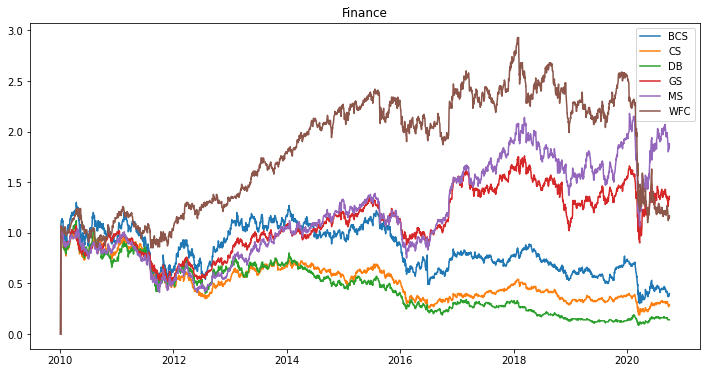

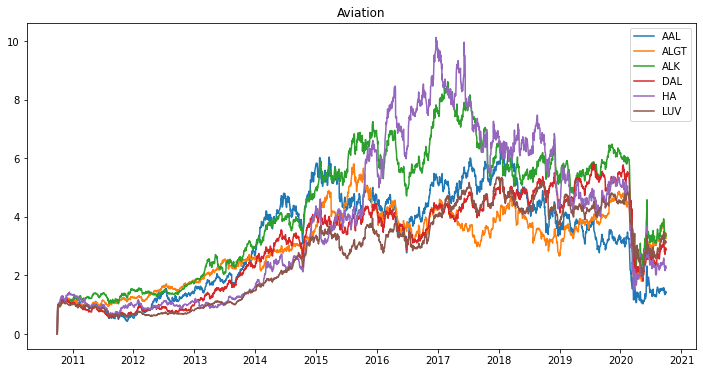

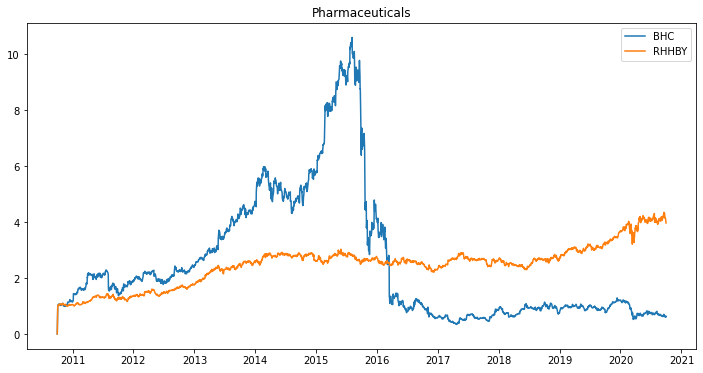

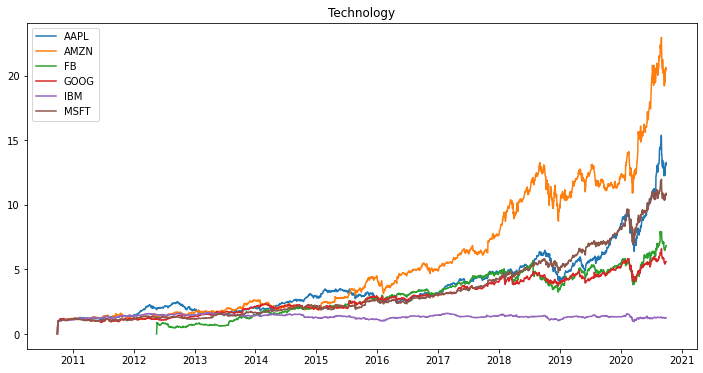

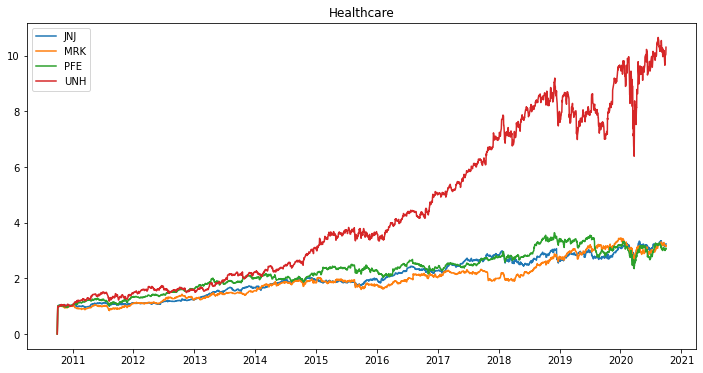

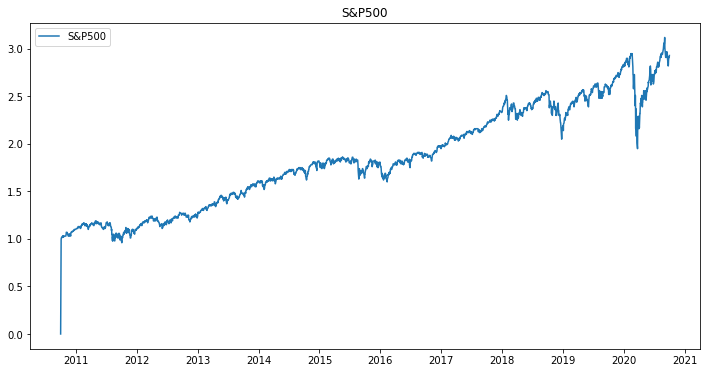

In [ ]:
for i in stock_df['Industry'].unique():
    industry_df = get_industry_df(
        industry_=i, column_='Cumulative Return')

    plt.figure(figsize=(12,6))
    plt.plot(industry_df)
    plt.legend(industry_df.columns.values)
    plt.title(i)
    plt.show()

##### **Observations:**
1. We can see for Finance industry the Cumulative Return for the span of 10 years shows that stocks like `GS, MS and WFC` haven't performed well with cumulative return range between 1% to less than 3%.
2. In Aviation industry the cumulative return moves between 1% to 10% for span of a decade.
3. For Pharmaceuticals industry the cumulative return ranged from 1% to 10% till halve of 2015 but after sudden drop in other halve of 2015 it ranged from 1% to just 4%
4. Technology industry stocks have highest Cumulative return for last 10 years with range of 1 % to more than 25%, except the `IBM` stock with cumulative return of just 1% for 10 years. 
5. In Healthcare industry, the only well performning stock is `UNH` with cumulative range between 1% to more than 11% otherwise other stocks have cumulative range below 3%.

### **3.3** Visualizing distribution of stocks using Distribution plot based on Return from stocks

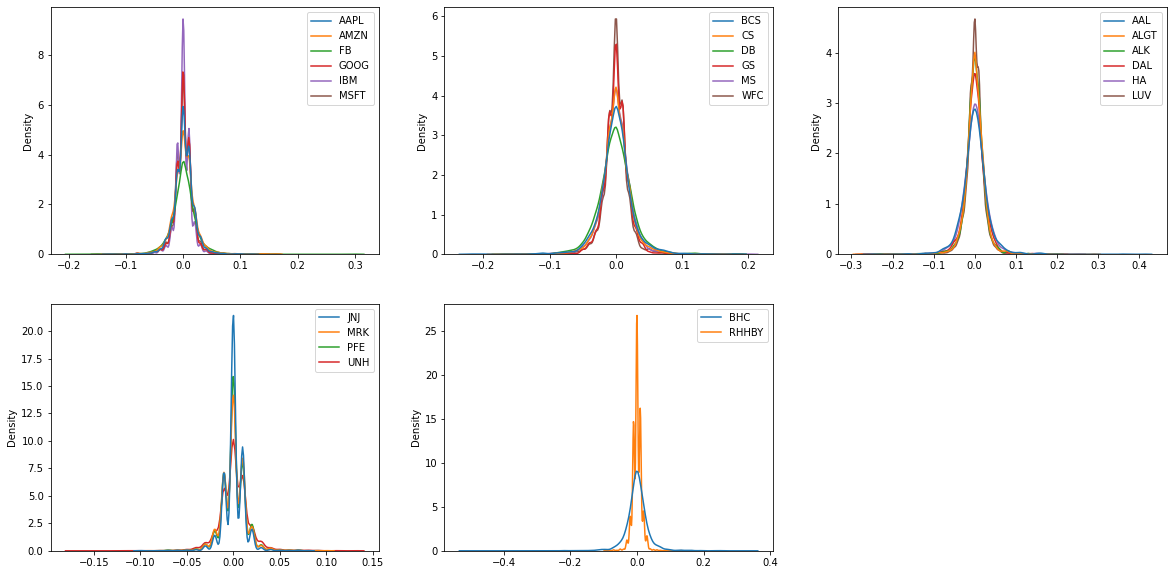

In [ ]:
# assigning subplot matrix form and figsize
fig, ax = plt.subplots(2,3, figsize=(20,10))

# Tech Industry Dist Plot
sns.kdeplot(data=tech_df,ax=ax[0][0])

# Finance Industry Dist Plot
sns.kdeplot(data=fin_df,ax=ax[0][1])

# Aviation Industry Dist Plot
sns.kdeplot(data=avi_df,ax=ax[0][2])

# Health Industry Dist Plot
sns.kdeplot(data=health_df,ax=ax[1][0])

# Pharmaceuticals Industry Dist Plot
sns.kdeplot(data=pharma_df,ax=ax[1][1])

fig.delaxes(ax[1][2])
fig.show()


##### **Observations:**
1. Technology:
  * `AMZN and AAPL` have peak towards positive side followed by `MSFT and GOOG`, that means investing in this while have high and positive returns, unlike `IBM` have costant even after longer time investment.
2. Finance:
  * `CS, BCS and GS` have peak towards positive side that means investing in this while have high and positive returns after longer period of invsetment.
3. Aviation:
  * `AAL, DAL, LUV and AKL` have peak towards positive side that means investing in this while have high and positive returns after longer period of invsetment.
4. Healthcare:
  * `JNJ and MRK` have peak towards positive side that means investing in this while have high and positive returns after longer period of invsetment.
5. Pharmaceuticals:
  * The spread of curve for `BHC` shows that the return will be constant even spread for longer period and in case of `RHHBY` the return will be less than 0 even for longer time investment.

### **3.4** Visualizing correlation between stocks using Heatmap Subplots based on return

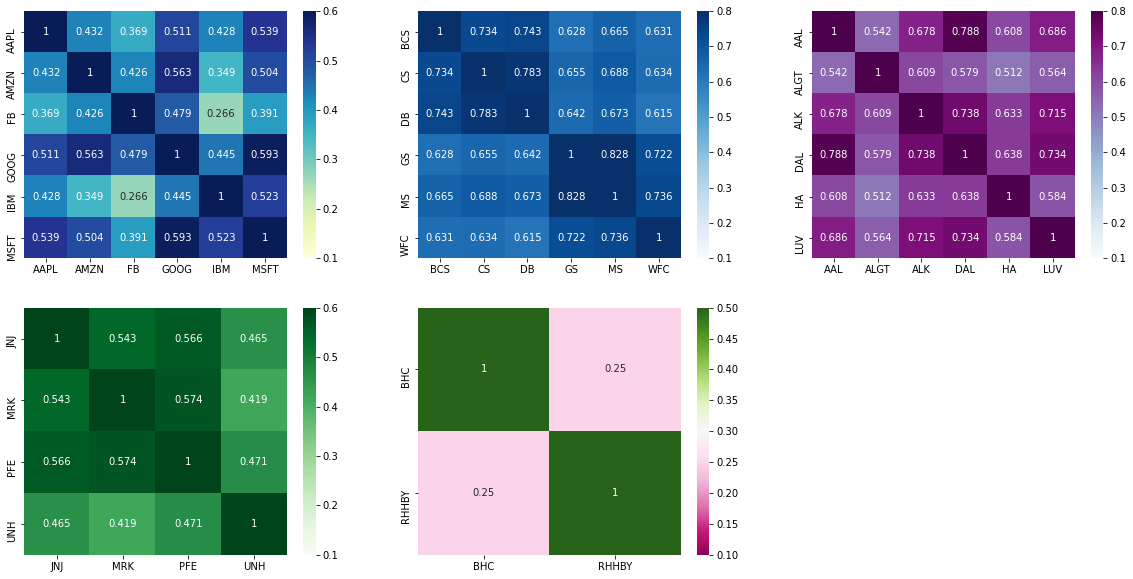

In [ ]:
# Plotting The Heatmap for the Co-Relation
fig, ax = plt.subplots(2,3, figsize=(20,10))

# Tech Industry Heatmap
sns.heatmap(tech_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu', vmin=0.1, vmax=0.6, ax=ax[0][0])
# Finance Industry Heatmap
sns.heatmap(fin_df.corr(),annot=True,fmt=".3g",cmap='Blues', vmin=0.1, vmax=0.8, ax=ax[0][1])
# Aviation Industry Heatmap
sns.heatmap(avi_df.corr(),annot=True,fmt=".3g",cmap='BuPu', vmin=0.1, vmax=0.8, ax=ax[0][2])
# Heathcare Industry Heatmap
sns.heatmap(health_df.corr(),annot=True,fmt=".3g",cmap='Greens', vmin=0.1, vmax=0.6,ax=ax[1][0])
# Pharmaceuticals Industry Heatmap
sns.heatmap(pharma_df.corr(),annot=True,fmt=".3g",cmap='PiYG', vmin=0.1, vmax=0.5,ax=ax[1][1])

fig.delaxes(ax[1][2])
plt.show()

##### **Observations:**
1. For Technology industry below mentioned stocks have high correlation and combined can give high returns.
  * MSFT-AAPL, MSFT-AMZN, MSFT-GOOG, MSFT-IBM
  * GOOG-AAPL, GOOG-AMZN

2. For Finance industry below mentioned stocks have high correlation and combined can give high returns.
  * DB-CS-BCS
  * GS-MS-WFC

3. For Aviantion industry below mentioned stocks have high correlation and combined can give high returns.
  * AAL-DAL, AAL-LUV
  * ALK-LUV, ALK-AAL, ALK-DAL
  * DAL-LUV

4. For Healthcare industry below mentioned stocks have high correlation and combined can give high returns.
  * PFE-JNJ-MRK

5. In Pharmaceuticals there seems to be no correlation between any stock. Hence, not recommended to invest in any stocks of this industry.

#### **NOTE - Two stocks that are highly correlated, among both investing in any one is suggested as they both have same return pattern**

### **3.5** Visualizing Trend Type of stocks using Candelstick
* Uptrend
* Downtrend
* Sideways Trend 

#### **3.5.1** Technology Industry

In [ ]:
fullTech_df = stock_df[stock_df['Industry']=='Technology']

candleFig = go.Figure(data=[go.Candlestick(x=fullTech_df['Date'],
                                           open=fullTech_df['Open'],
                                           high=fullTech_df['High'],
                                           low=fullTech_df['Low'],
                                           close=fullTech_df['Close'])
])
candleFig.update_layout(xaxis_rangeslider_visible=False, xaxis_title='Year', yaxis_title='Stock Price')
candleFig.show()

##### **Observations:**
1. After observing the visualization 2 of the stocks show Uptrend (profitable trend) while remaining stocks show sideways trend (i.e. neither profit nor loss).

#### **3.5.2** Aviation Industry

In [ ]:
fullAvi_df = stock_df[stock_df['Industry']=='Aviation']

candleFig = go.Figure(data=[go.Candlestick(x=fullAvi_df['Date'],
                                           open=fullAvi_df['Open'],
                                           high=fullAvi_df['High'],
                                           low=fullAvi_df['Low'],
                                           close=fullAvi_df['Close'])
])
candleFig.update_layout(xaxis_rangeslider_visible=False, xaxis_title='Year', yaxis_title='Stock Price')
candleFig.show()

##### **Observations:**
1. There seems to be Uptrend till 2014 but after that they show Sideways trends which means they have constant returns after 2014.

#### **3.5.3** Finance

In [ ]:
fullFin_df = stock_df[stock_df['Industry']=='Finance']

candleFig = go.Figure(data=[go.Candlestick(x=fullFin_df['Date'],
                                           open=fullFin_df['Open'],
                                           high=fullFin_df['High'],
                                           low=fullFin_df['Low'],
                                           close=fullFin_df['Close'])
])
candleFig.update_layout(xaxis_rangeslider_visible=False, xaxis_title='Year', yaxis_title='Stock Price')
candleFig.show()

##### **Observations:**
1. Visualizing above plot we can see that only 1 stock shows Uptrend from 2011 to 2015 but after that it shows a sudden drop and than has sideways trend .
2. Remaining stocks have sideways trend with not much return to show.

#### **3.5.4** Healthcare 

In [ ]:
fullHealth_df = stock_df[stock_df['Industry']=='Healthcare']

candleFig = go.Figure(data=[go.Candlestick(x=fullHealth_df['Date'],
                                           open=fullHealth_df['Open'],
                                           high=fullHealth_df['High'],
                                           low=fullHealth_df['Low'],
                                           close=fullHealth_df['Close'])
])
candleFig.update_layout(xaxis_rangeslider_visible=False, xaxis_title='Year', yaxis_title='Stock Price')
candleFig.show()

##### **Observations:**
1. Only one stocks shows a constant Upper trend else all other have sideways trend.

#### **3.5.5** Pharmaceuticals

In [ ]:
fullPharma_df = stock_df[stock_df['Industry']=='Pharmaceuticals']

candleFig = go.Figure(data=[go.Candlestick(x=fullPharma_df['Date'],
                                           open=fullPharma_df['Open'],
                                           high=fullPharma_df['High'],
                                           low=fullPharma_df['Low'],
                                           close=fullPharma_df['Close'])
])
candleFig.update_layout(xaxis_rangeslider_visible=False, xaxis_title='Year', yaxis_title='Stock Price')
candleFig.show()

##### **Observations:**
1. There's an upper trend for one stock till mid of 2015 and than there was a sudden drop after which the stock showed a sideway trend.

### **3.6** Visualizing data statistically based on Retuns of each stocks
---
#### **Note:**<br> ***For this visualization we are going to focus on std (standard deviation) or coef_variation (coefficient of variation) to analyze which stock need to be choose for different profiling clients.***
---
* `coef_variation or Coefficient of Variation` represents the risk ratio of the stocks i.e. stock with least coef_variation value has low risk and hence has low return or is a worst stock. But stocks having high coef_variation value implies high risk with high return value or is a best performing stock.

* `std or Standard Deviation` represents smiliar functionality like `coef_variation` more risky stocks will have more std values while stocks with less risk will have less std values.

#### **3.6.1** Technology Stocks

In [ ]:
tech_desc_df = tech_df.describe().T
tech_desc_df['coef_variation'] = tech_desc_df['mean']/tech_desc_df['std']
round(tech_desc_df.T,3)

AAPL      AMZN        FB      GOOG       IBM      MSFT
count           2517.000  2517.000  2106.000  2517.000  2517.000  2517.000
mean               0.001     0.001     0.001     0.001     0.000     0.001
std                0.018     0.020     0.024     0.016     0.014     0.016
min               -0.130    -0.130    -0.190    -0.110    -0.130    -0.150
25%               -0.010    -0.010    -0.010    -0.010    -0.010    -0.010
50%               -0.000     0.000    -0.000    -0.000     0.000     0.000
75%                0.010     0.010     0.010     0.010     0.010     0.010
max                0.120     0.160     0.300     0.160     0.110     0.140
coef_variation     0.072     0.071     0.046     0.058     0.011     0.069

##### **Observations:**
* Stocks like `AAPL, AMZN and MSFT` have high coef_variation and std values. Hence, we can select these three for client who is okay with high risk stocks, but also wants high return from them.
* If interested and looking future trends in above plots one could also be suggested to invest in `GOOG` stock.
* `IBM` shows low coef_variation as well as std, so this cannot be suggested for investment. Above plots also support these suggestions.

#### **3.6.2** Finance Stocks

In [ ]:
fin_desc_df = fin_df.describe().T
fin_desc_df['coef_variation'] = fin_desc_df['mean']/fin_desc_df['std']
round(fin_desc_df.T,3)

BCS        CS        DB        GS        MS       WFC
count           2705.000  2705.000  2705.000  2705.000  2705.000  2705.000
mean               0.000    -0.000    -0.000     0.000     0.000     0.000
std                0.026     0.022     0.027     0.019     0.023     0.019
min               -0.220    -0.180    -0.170    -0.130    -0.160    -0.160
25%               -0.010    -0.010    -0.010    -0.010    -0.010    -0.010
50%               -0.000    -0.000     0.000     0.000    -0.000     0.000
75%                0.010     0.010     0.010     0.010     0.010     0.010
max                0.180     0.160     0.180     0.180     0.200     0.150
coef_variation     0.002    -0.012    -0.015     0.015     0.021     0.008

##### **Observations:**
1. In finance industry all the stocks show poor coef_variation and std values which says that though there is low risk in these stocks but the return from these will also be low or one could loss their investment.
2. Eventhough, client wants to invest on the assumption that they might improve well in future than stocks like `MS and GS` could be suggested as they have better coef_variation and std as compare to other stocks in this industry.

#### **3.6.3** Healthcare Stocks

In [ ]:
health_desc_df = health_df.describe().T
health_desc_df['coef_variation'] = health_desc_df['mean']/health_desc_df['std']
round(health_desc_df.T, 3)

JNJ       MRK       PFE       UNH
count           2517.000  2517.000  2517.000  2517.000
mean               0.001     0.001     0.001     0.001
std                0.011     0.013     0.013     0.017
min               -0.100    -0.090    -0.080    -0.170
25%                0.000    -0.010    -0.010    -0.010
50%                0.000     0.000     0.000     0.000
75%                0.010     0.010     0.010     0.010
max                0.080     0.100     0.090     0.130
coef_variation     0.060     0.042     0.043     0.064

##### **Observations:**
1. After visualizing and understanding Healthcare industry stocks on the basis of coef_variation and std values `JNJ and UNH` must suggested for the investment as these have high risk with high return in this industry stocks.
2. For client looking for low risk and good return stocks in Healthcare industry than `MRK and PFE` can be suggested to invest in for longer time.

#### **3.6.4** Aviation Stocks

In [ ]:
avi_desc_df = avi_df.describe().T
avi_desc_df['coef_variation'] = avi_desc_df['mean']/avi_desc_df['std']
round(avi_desc_df.T, 3)

AAL      ALGT       ALK       DAL        HA       LUV
count           2517.000  2517.000  2517.000  2517.000  2517.000  2517.000
mean               0.001     0.001     0.001     0.001     0.001     0.001
std                0.033     0.025     0.024     0.026     0.030     0.021
min               -0.250    -0.280    -0.230    -0.260    -0.270    -0.150
25%               -0.010    -0.010    -0.010    -0.010    -0.010    -0.010
50%                0.000    -0.000     0.000     0.000    -0.000     0.000
75%                0.020     0.010     0.010     0.010     0.020     0.010
max                0.410     0.290     0.200     0.210     0.250     0.140
coef_variation     0.020     0.033     0.034     0.030     0.031     0.033

##### **Observations:**
1. Looking at the coef_variation and std values of stocks, clients willing to take less risk for sufficient return of investment must invest in these stocks.
2. Mostly, clien should invest in `ALK, ALGT and LUV` for sufficient return of investment. In such case investment should be for longer time.

#### **3.6.5** Pharmaceuticals Stocks

In [ ]:
pharma_desc_df = pharma_df.describe().T
pharma_desc_df['coef_variation'] = pharma_desc_df['mean']/pharma_desc_df['std']
round(pharma_desc_df.T, 3)

BHC     RHHBY
count           2517.000  2517.000
mean               0.000     0.001
std                0.036     0.014
min               -0.510    -0.090
25%               -0.010    -0.010
50%                0.000     0.000
75%                0.010     0.010
max                0.340     0.130
coef_variation     0.012     0.045

##### **Observations:**
1. Though there are only two stocks in Pharmaceuticals industry, if client wants to invest in the stocks of this industry than RHHBY must be choosed for investment, but std value also suggest that return could be low.
2. Being stock analyst, it is suggested not to invest in this industry stocks.

# **Step 4: Profiling**

## **4.1** Profile 1 -> Patrick
* On the basis of understanding we have collected after performing all the above steps, we are building Profile 1 for `Patrick`.
  * Patrick is looking for decent standard living post retirement 
  * He is looking to invest in such stocks those have low risk and have high or good return.

### **4.1.1** Creating new dataframe and finding Correlation between stocks using Heatmap

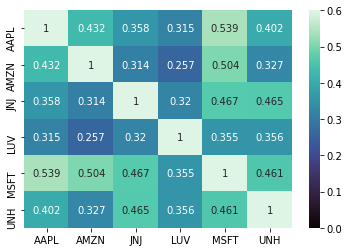

In [ ]:
# cumulating all the stocks best for Patrick into new dataframe
patrickStocks_df=get_industry_df(
    ticker_list_=['AMZN', 'MSFT','AAPL', 
                  'JNJ', 'UNH', 
                  'LUV'], 
    column_='Return')

# plotting correlation between stocks with Heatmap
sns.heatmap(patrickStocks_df.corr(),annot=True,fmt=".3g", cmap= 'mako', vmin=0, vmax=0.6)
plt.show()

##### **Obsertavtions:**
1. MSFT stock seems to highly coorelated with AAPL and AMZN so we could drop either of the stocks.
2. In this we are going to drop MSFT as it low return and cumulative return when campared with AAPL and AMZN stocks.

In [ ]:
# creating new dataframe without MSFT in it
patrickStocks_newDf=get_industry_df(
    ticker_list_=['AMZN','AAPL', 
                  'JNJ', 'UNH', 
                  'LUV'], 
    column_='Return')

# printing first 5 rows of the Patrcik Portfolio
patrickStocks_newDf.head()

AAPL  AMZN   JNJ   LUV   UNH
Date                                    
2010-10-01  0.00  0.00  0.00  0.00  0.00
2010-10-04 -0.01  0.01 -0.00 -0.01 -0.03
2010-10-05  0.04  0.04  0.02  0.02  0.02
2010-10-06  0.00 -0.03  0.01 -0.01 -0.03
2010-10-07  0.00  0.01  0.00 -0.00  0.01

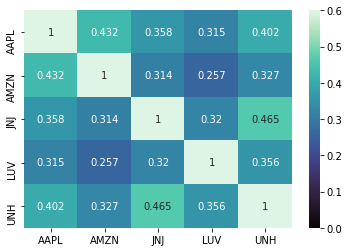

In [ ]:
# plotting correlation between stocks with Heatmap
sns.heatmap(patrickStocks_newDf.corr(),annot=True,fmt=".3g", cmap='mako', vmin=0, vmax=0.6)
plt.show()

##### **Observations:**
* Now, all the stocks seems to be properly diversified and this is an optimum portfolio for Patrick to invest in.

### **4.1.2** Calculating cumulative return of the stocks selected for Patrick
* Cumulative return over period of 10 years
* Cumulative return over period of 5 years

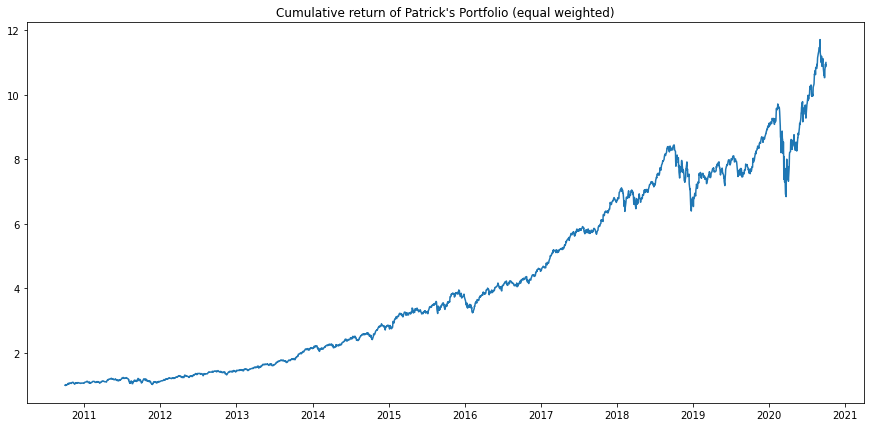

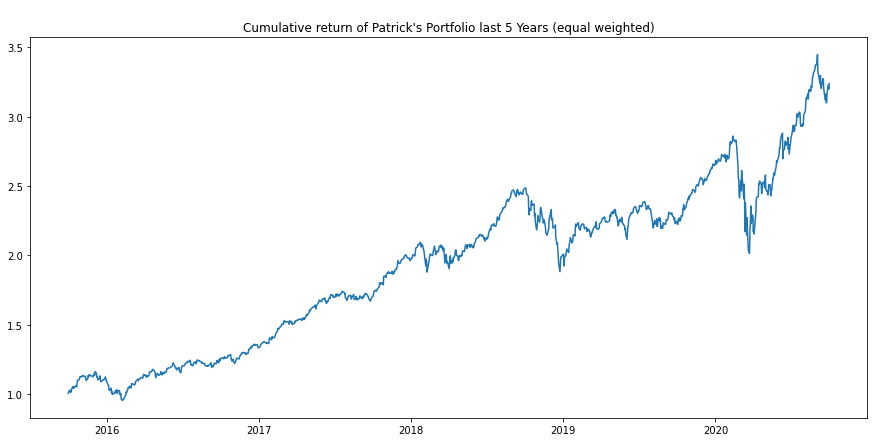

In [ ]:
# calculating number of cloumns
col_len_patrickStock = len(patrickStocks_newDf.columns.values)

#
weightsPatrickStock = [1/col_len_patrickStock for i in range(col_len_patrickStock)]

# calculating cumulative return of stocks for Patrick over period of 10 years
cumulative_patrickStock_newDf = pd.DataFrame(
    (1+patrickStocks_newDf.multiply(weightsPatrickStock, axis=1).sum(axis=1)).cumprod())
# plotting cumulative return of stocks for Patrick over period of 10 years
plt.figure(figsize=(15,7))
plt.plot(cumulative_patrickStock_newDf)
plt.title("Cumulative return of Patrick's Portfolio (equal weighted)")
plt.show()
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# calculating cumulative return of stocks for Patrick over period of 5 years
cumulative_patrickStock_newDf_5yrs = pd.DataFrame(
    (1+patrickStocks_newDf.loc['2015-10-01':].multiply(weightsPatrickStock, axis=1)
    .sum(axis=1)).cumprod())
# plotting cumulative return of stocks for Patrick over period of 10 years
plt.figure(figsize=(15,7))
plt.plot(cumulative_patrickStock_newDf_5yrs)
plt.title("\nCumulative return of Patrick's Portfolio last 5 Years (equal weighted)")
plt.show()

### **4.1.3** Statistical understanding based on Cumulative Retuns of each stocks selected for Patrick

In [ ]:
patrickStocks_newDf_desc = patrickStocks_newDf.describe().T
patrickStocks_newDf_desc['coef_variation'] = patrickStocks_newDf_desc['mean']/patrickStocks_newDf_desc['std']
round(patrickStocks_newDf_desc.T, 3)

AAPL      AMZN       JNJ       LUV       UNH
count           2517.000  2517.000  2517.000  2517.000  2517.000
mean               0.001     0.001     0.001     0.001     0.001
std                0.018     0.020     0.011     0.021     0.017
min               -0.130    -0.130    -0.100    -0.150    -0.170
25%               -0.010    -0.010     0.000    -0.010    -0.010
50%               -0.000     0.000     0.000     0.000     0.000
75%                0.010     0.010     0.010     0.010     0.010
max                0.120     0.160     0.080     0.140     0.130
coef_variation     0.072     0.071     0.060     0.033     0.064

##### **Observations:**
1. Both plots in 4.1.2 show that stocks can provide high return.
2. Statistical view confirms that all these stock have high coef_variation that means these stocks could provide high or sufficient return on investment, but low std means they also have low risk associated with them.
3. Based on the plotting and statstical represntation in 4.1.2 and 4.1.3 we could conclude these are the best for the Patrick and clients having similar profile.
4. A dip after 2020 could be due to spread of Pandemic affecting closing of various bussinesses all over the World. 

## **4.2** Profile 2 -> Peter
* On the basis of understanding we have collected after performing all the above steps, we are building 2nd Profile for `Peter`(son of Patrick).
  * Peter is looking for investing in high risk and high return providing stocks. 
  * He is willing to investe in stocks having high risk and providing high return of investment.

### **4.2.1** Creating new dataframe and finding correlation between stocks using Heatmap

In [ ]:
# cumulating all the stocks best for Peter into new dataframe
peterStocks_df=get_industry_df(
    ticker_list_=['AMZN','AAPL','MSFT','FB',
                   'UNH', 
                  'ALK'], 
    column_='Return')

# printing first 5 rows of the Patrcik Portfolio
patrickStocks_newDf.head()

AAPL  AMZN   JNJ   LUV   UNH
Date                                    
2010-10-01  0.00  0.00  0.00  0.00  0.00
2010-10-04 -0.01  0.01 -0.00 -0.01 -0.03
2010-10-05  0.04  0.04  0.02  0.02  0.02
2010-10-06  0.00 -0.03  0.01 -0.01 -0.03
2010-10-07  0.00  0.01  0.00 -0.00  0.01

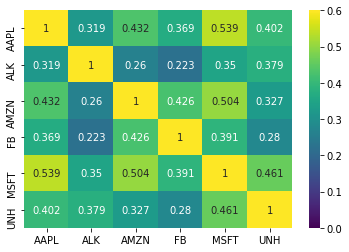

In [ ]:
# plotting correlation between stocks with Heatmap
sns.heatmap(peterStocks_df.corr(),annot=True,fmt=".3g",cmap='viridis', vmin=0, vmax=0.6)
plt.show()

##### **Observations:**
* All the stocks seems to be properly diversified and this is an optimum portfolio for Peter to invest in.



### **4.2.2** Calculating cumulative return of the stocks selected for Peter
* Cumulative return over period of 10 years
* Cumulative return over period of 5 years

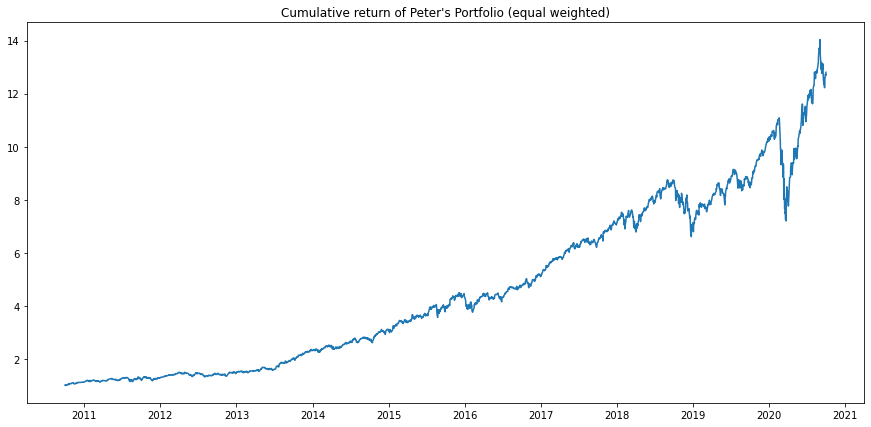

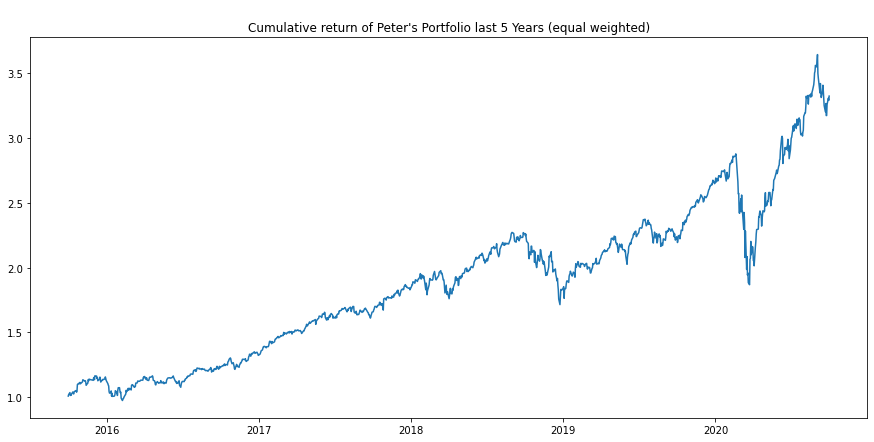

In [ ]:
# calculating number of cloumns
col_len_peterStock = len(peterStocks_df.columns.values)

# 
weightsPeterStock = [1/col_len_peterStock for i in range(col_len_peterStock)]

# calculating cumulative return of stocks for Peter over period of 10 years
cumulative_peterStock_df = pd.DataFrame(
    (1+peterStocks_df.multiply(weightsPeterStock, axis=1)\
                     .sum(axis=1))\
    .cumprod())
# plotting cumulative return of stocks for Peter over period of 10 years
plt.figure(figsize=(15,7))
plt.plot(cumulative_peterStock_df)
plt.title("Cumulative return of Peter's Portfolio (equal weighted)")
plt.show()
#-----------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------
# calculating cumulative return of stocks for Peter over period of 5 years
cumulative_peterStock_df_5yrs = pd.DataFrame(
    (1+peterStocks_df.loc['2015-10-01':].multiply(weightsPeterStock, axis=1)\
                     .sum(axis=1))\
    .cumprod())
# plotting cumulative return of stocks for Peter over period of 5 years
plt.figure(figsize=(15,7))
plt.plot(cumulative_peterStock_df_5yrs)
plt.title("\nCumulative return of Peter's Portfolio last 5 Years (equal weighted)")
plt.show()

### **4.2.3** Statistical understanding based on Cumulative Retuns of each stocks selected for Peter

In [ ]:
peterStocks_df_desc = peterStocks_df.describe().T
peterStocks_df_desc['coef_variation'] = peterStocks_df_desc['mean']/peterStocks_df_desc['std']
round(peterStocks_df_desc.T, 3)

AAPL       ALK      AMZN        FB      MSFT       UNH
count           2517.000  2517.000  2517.000  2106.000  2517.000  2517.000
mean               0.001     0.001     0.001     0.001     0.001     0.001
std                0.018     0.024     0.020     0.024     0.016     0.017
min               -0.130    -0.230    -0.130    -0.190    -0.150    -0.170
25%               -0.010    -0.010    -0.010    -0.010    -0.010    -0.010
50%               -0.000     0.000     0.000    -0.000     0.000     0.000
75%                0.010     0.010     0.010     0.010     0.010     0.010
max                0.120     0.200     0.160     0.300     0.140     0.130
coef_variation     0.072     0.034     0.071     0.046     0.069     0.064

##### **Observations:**
1. Both plots in 4.2.2 show that stocks can provide high return.
2. Statistical view confirms that all these stock have high coef_variation that means these stocks could provide high return on investment, but high std means they also have high risk associated with them.
3. Though FB has low coef_variation but it could return high return if invested for longer period which could be confirmed for Cumulative Return or Return plotting in 3.2 and 3.3 steps.
4. Based on the plotting and statstical represntation in 4.1.2 and 4.1.3 we could conclude these are the best for the Patrick and clients having similar profile.
5. A dip after 2020 could be due to spread of Pandemic affecting closing of various bussinesses all over the World. 

---
## **Note:** Stocks for Pharmaceuticals and Healthcare have not been included/considered because of their low return and high risk condition.
---